# Udacity Project - Identify Fraud from Enron Dataset

## Data Exploration and Feature Selection

In this project, we are asked to identify "persons of interest" (poi) from financial and email data of Enron employees.

Here, some preprocessing steps are described, starting with a quick exploration of the provided dataset. The following steps involve some cleaning/outlier removal, feature engineering and feature selection.

### 1. Exploratory Analysis

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [2]:
# Visualizing the data structure
data_dict["METTS MARK"]

{'salary': 365788,
 'to_messages': 807,
 'deferral_payments': 'NaN',
 'total_payments': 1061827,
 'loan_advances': 'NaN',
 'bonus': 600000,
 'email_address': 'mark.metts@enron.com',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 585062,
 'expenses': 94299,
 'from_poi_to_this_person': 38,
 'exercised_stock_options': 'NaN',
 'from_messages': 29,
 'other': 1740,
 'from_this_person_to_poi': 1,
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 702,
 'restricted_stock': 585062,
 'director_fees': 'NaN'}

In [3]:
df = pd.DataFrame.from_dict(data_dict, orient="index")
df.replace("NaN", np.nan, inplace=True)
df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,NaN,4175000.0,phillip.allen@enron.com,-126027.0,-3081055.0,1729541.0,...,47.0,1729541.0,2195.0,152.0,65.0,False,304805.0,1407.0,126027.0,NaN
BADUM JAMES P,NaN,NaN,178980.0,182466.0,NaN,NaN,NaN,NaN,NaN,257817.0,...,NaN,257817.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,NaN,NaN,james.bannantine@enron.com,-560222.0,-5104.0,5243487.0,...,39.0,4046157.0,29.0,864523.0,0.0,False,NaN,465.0,1757552.0,NaN
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,10623258.0,...,NaN,6680544.0,NaN,2660303.0,NaN,False,1586055.0,NaN,3942714.0,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,frank.bay@enron.com,-82782.0,-201641.0,63014.0,...,NaN,NaN,NaN,69.0,NaN,False,NaN,NaN,145796.0,NaN


In [4]:
# Due to "NaN", fields are incorrectly classified as pandas' objects instead of numeric.
df.iloc[:,0:6].apply(pd.to_numeric)
df.iloc[:,7:17].apply(pd.to_numeric)
df.iloc[:,18:22].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
loan_advances                4 non-null float64
bonus                        82 non-null float64
email_address                111 non-null object
restricted_stock_deferred    18 non-null float64
deferred_income              49 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
from_poi_to_this_person      86 non-null float64
exercised_stock_options      102 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
long_term_incentive          66 non-null float6

In [5]:
# Checking only for poi data:
df[df.poi==1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, BELDEN TIMOTHY N to YEAGER F SCOTT
Data columns (total 21 columns):
salary                       17 non-null float64
to_messages                  14 non-null float64
deferral_payments            5 non-null float64
total_payments               18 non-null float64
loan_advances                1 non-null float64
bonus                        16 non-null float64
email_address                18 non-null object
restricted_stock_deferred    0 non-null float64
deferred_income              11 non-null float64
total_stock_value            18 non-null float64
expenses                     18 non-null float64
from_poi_to_this_person      14 non-null float64
exercised_stock_options      12 non-null float64
from_messages                14 non-null float64
other                        18 non-null float64
from_this_person_to_poi      14 non-null float64
poi                          18 non-null bool
long_term_incentive          12 non-null float64


In [7]:
for name in df.index:
    print(name)

ALLEN PHILLIP K
BADUM JAMES P
BANNANTINE JAMES M
BAXTER JOHN C
BAY FRANKLIN R
BAZELIDES PHILIP J
BECK SALLY W
BELDEN TIMOTHY N
BELFER ROBERT
BERBERIAN DAVID
BERGSIEKER RICHARD P
BHATNAGAR SANJAY
BIBI PHILIPPE A
BLACHMAN JEREMY M
BLAKE JR. NORMAN P
BOWEN JR RAYMOND M
BROWN MICHAEL
BUCHANAN HAROLD G
BUTTS ROBERT H
BUY RICHARD B
CALGER CHRISTOPHER F
CARTER REBECCA C
CAUSEY RICHARD A
CHAN RONNIE
CHRISTODOULOU DIOMEDES
CLINE KENNETH W
COLWELL WESLEY
CORDES WILLIAM R
COX DAVID
CUMBERLAND MICHAEL S
DEFFNER JOSEPH M
DELAINEY DAVID W
DERRICK JR. JAMES V
DETMERING TIMOTHY J
DIETRICH JANET R
DIMICHELE RICHARD G
DODSON KEITH
DONAHUE JR JEFFREY M
DUNCAN JOHN H
DURAN WILLIAM D
ECHOLS JOHN B
ELLIOTT STEVEN
FALLON JAMES B
FASTOW ANDREW S
FITZGERALD JAY L
FOWLER PEGGY
FOY JOE
FREVERT MARK A
FUGH JOHN L
GAHN ROBERT S
GARLAND C KEVIN
GATHMANN WILLIAM D
GIBBS DANA R
GILLIS JOHN
GLISAN JR BEN F
GOLD JOSEPH
GRAMM WENDY L
GRAY RODNEY
HAEDICKE MARK E
HANNON KEVIN P
HAUG DAVID L
HAYES ROBERT E
HAYSLETT RODERIC

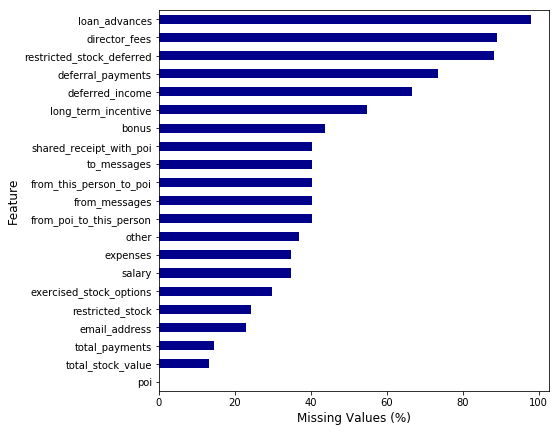

In [23]:
miss_percentage = (1-df.count()/144)*100
#% matplotlib inline
plt.figure(figsize=(7,7))
miss_percentage.sort_values().plot.barh(color='darkblue')
plt.xlabel("Missing Values (%)", fontsize=12)
plt.ylabel("Feature", fontsize=12);

Initially, the data structure was visualized, and an appropriate strategy was devised for importing the data into a pandas' Dataframe.

By using `.info()`, we see that a striking feature of the dataset is the large number of null values. Many features have a large number of missing values. When we check only for the POI entries, two important facts are observed. The first is that the dataset is unbalanced, and only 18 people are POI. This will require special care when setting up models and when evaluating their efficiency. The second important fact is that the variables "restricted_stock_deferred" and "director_fees" carry no information about POI, and may be discarded from the beginning. 

By inspecting the indexes, we observe two entries that do not correspond to Enron employees. The first is "TOTAL", which can also be identified as an outlier in financial values, and "THE TRAVEL AGENCY IN THE PARK". Both were incorrectly inserted into the data set, and must be removed.

In [5]:
df = df.drop("TOTAL")
df = df.drop("THE TRAVEL AGENCY IN THE PARK")

In [6]:
df.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,9.400000e+01,86.000000,3.800000e+01,1.230000e+02,3.000000e+00,8.100000e+01,1.700000e+01,4.800000e+01,1.250000e+02,94.000000,86.000000,1.010000e+02,86.000000,9.100000e+01,86.000000,6.500000e+01,86.000000,1.090000e+02,16.000000
mean,2.840875e+05,2073.860465,8.416025e+05,2.641806e+06,2.797500e+07,1.201773e+06,6.218928e+05,-5.810498e+05,3.352073e+06,54192.010638,64.895349,2.959559e+06,608.790698,4.664105e+05,41.232558,7.464912e+05,1176.465116,1.147424e+06,89822.875000
std,1.771311e+05,2582.700981,1.289323e+06,9.524694e+06,4.638256e+07,1.441679e+06,3.845528e+06,9.420764e+05,6.532883e+06,46108.377454,86.979244,5.499450e+06,1841.033949,1.397376e+06,100.073111,8.629174e+05,1178.317641,2.249770e+06,41112.700735
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,4.000000e+05,7.000000e+04,-1.787380e+06,-3.504386e+06,-4.409300e+04,148.000000,0.000000,3.285000e+03,12.000000,2.000000e+00,0.000000,6.922300e+04,2.000000,-2.604490e+06,3285.000000
25%,2.118020e+05,541.250000,7.964450e+04,3.969340e+05,1.200000e+06,4.250000e+05,-3.298250e+05,-6.112092e+05,4.941360e+05,22479.000000,10.000000,5.067650e+05,22.750000,1.203000e+03,1.000000,2.750000e+05,249.750000,2.520550e+05,83674.500000
50%,2.587410e+05,1211.000000,2.210635e+05,1.101393e+06,2.000000e+06,7.500000e+05,-1.402640e+05,-1.519270e+05,1.095040e+06,46547.500000,35.000000,1.297049e+06,41.000000,5.158700e+04,8.000000,4.221580e+05,740.500000,4.410960e+05,106164.500000
75%,3.086065e+05,2634.750000,8.672112e+05,2.087530e+06,4.176250e+07,1.200000e+06,-7.241900e+04,-3.792600e+04,2.606763e+06,78408.500000,72.250000,2.542813e+06,145.500000,3.319830e+05,24.750000,8.318090e+05,1888.250000,9.850320e+05,112815.000000
max,1.111258e+06,15149.000000,6.426990e+06,1.035598e+08,8.152500e+07,8.000000e+06,1.545629e+07,-8.330000e+02,4.911008e+07,228763.000000,528.000000,3.434838e+07,14368.000000,1.035973e+07,609.000000,5.145434e+06,5521.000000,1.476169e+07,137864.000000


In [7]:
df.shape

(144, 21)

By inspecting the `.describe()` results after the cleaning/outlier removal, we see that the values are all in a valid range, and we can proceed with data analysis/ processing.

The final dimension of the dataset was also verified. We have 21 variables on 144 people, 18 being POI (12.5%).

#### Creating a few visualizations
Better understanding of the dataset and insights may be obtained by smart use of visualizations.

As an example, we may visualize the two features that will be implemented below. The first one is the fraction of emails that were sent TO poi, and the second the fraction of emails that were received FROM poi.

In [25]:
x = np.arange(len(df))

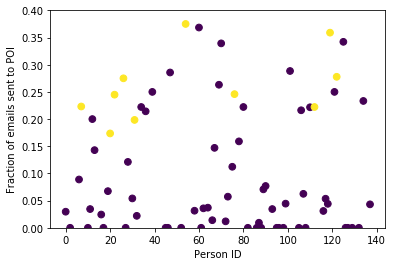

In [32]:
plt.scatter(x, (df.from_this_person_to_poi/df.from_messages), c=df.poi, s=45)
plt.xlabel("Person ID")
plt.ylabel("Fraction of emails sent to POI")
plt.ylim(0,0.4);

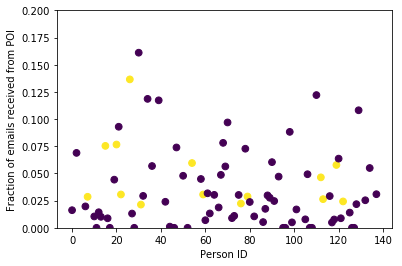

In [33]:
plt.scatter(x, (df.from_poi_to_this_person/df.to_messages), c=df.poi, s=45)
plt.xlabel("Person ID")
plt.ylabel("Fraction of emails received from POI")
plt.ylim(0,0.20);

POI are colored yellow for both graphs above, and one can see that, particularly for the fraction of emails sent to poi, a relatively good separation exists between poi/non-poi, making this a nice feature to be implemented. This will be confirmed in the feature selection/importance analysis below.

## 2. Feature Engineering and Feature Selection

In this section we will implement the new features (the ones visualized in the previous section) and select the features to be used in the supervised learning model.

The code below uses the structure already given in the "poi_id.py" file.

In [14]:
import sys
import pickle
sys.path.append("../tools/")

import numpy as np
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments',
                 'loan_advances', 'bonus', 'deferred_income', 'total_stock_value',
                 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive',
                 'restricted_stock', 'to_messages', 'from_messages', 'from_poi_to_this_person',
                 'from_this_person_to_poi','shared_receipt_with_poi', 'fraction_to_poi', 'fraction_from_poi']
# Removed director_fees and restricted_stock_deferred, as they didn't contain info on poi
# The last two features are created in Task 3 below

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [15]:
### Task 2: Remove outliers
# Removing the keys incorrectly inserted in the dataset:
del data_dict["TOTAL"]
del data_dict["THE TRAVEL AGENCY IN THE PARK"]

In [16]:
### Task 3: Create new feature(s)
# fraction of messages TO poi
for key in data_dict:
    person = data_dict[key]
    try:
        person["fraction_to_poi"] = int(person["from_this_person_to_poi"])/int(person["from_messages"])
    except:
        person["fraction_to_poi"] = 0
# fraction of messages FROM poi
for key in data_dict:
    person = data_dict[key]
    try:
        person["fraction_from_poi"] = int(person["from_poi_to_this_person"])/int(person["to_messages"])
    except:
        person["fraction_from_poi"] = 0
# When fields are "NaN" we are considering the fields to have value zero. This may not be the optimal strategy.       

### Store to my_dataset for easy export below.
my_dataset = data_dict

In [17]:
from sklearn.preprocessing import scale

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Scaling features
#features = scale(features)

For **feature selection**, recursive feature elimination with cross validation was employed.
- An initial estimator, an instance of Random Forest algorithm was created (with balanced weights due to unbalanced classes poi/non-poi)
- It was used in the RFECV function of scikit-learn, that uses feature importances to remove the "worst feature", one at a time, and returns the best-performing feature subset. The score chosen to measure performance was the F1-score, a "mix" of precision and recall.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
np.random.seed(42) # to avoid different results

estimator = RandomForestClassifier(n_estimators=100, class_weight='balanced')
selector = RFECV(estimator, cv=5, scoring="f1")
selector = selector.fit(features, labels)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

C:\Users\dmren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dmren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dmren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dmren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dmren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: Undefined

6
[False False False False  True False False  True False  True False  True
 False False False False  True  True False]
[ 2 13  7 14  1 12  3  1  5  1 11  1  8 10  6  9  1  1  4]


In [19]:
for ranking, feat in zip(selector.ranking_, features_list[1:]):
    print(ranking, feat)

2 salary
13 deferral_payments
7 total_payments
14 loan_advances
1 bonus
12 deferred_income
3 total_stock_value
1 expenses
5 exercised_stock_options
1 other
11 long_term_incentive
1 restricted_stock
8 to_messages
10 from_messages
6 from_poi_to_this_person
9 from_this_person_to_poi
1 shared_receipt_with_poi
1 fraction_to_poi
4 fraction_from_poi


From the results obtained from the recursive process for feature selection, the best performance was obtained when using only 6 features: "bonus", "expenses", "other", "restricted_stock", "shared_receipt_with_poi" and "fraction_to_poi". The last feature, "fraction_to_poi", was one of the created features, and this result confirms the good results already foreseen when plotting this feature.

One flaw in this strategy is the use of an estimator that was not tuned/optimized. By changing the parameters, different results could be obtained (potentially better results).

For the sake of simplicity, a conservative approach was used to eliminate only the most inefficient features. The F1 score obtained for each iteration of the RFECV was plotted below. One may observe that, when using more than 10 features, the performance of the classifier degrades significantly. Thus, **the features selected for implementation were the 10 best ranked features from the RFECV algorithm.**

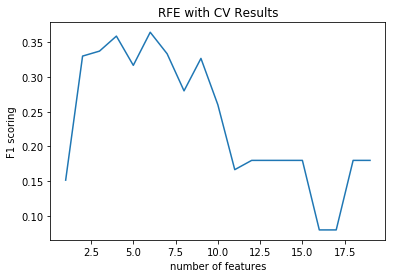

In [35]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,(len(selector.grid_scores_)+1)),selector.grid_scores_)
plt.xlabel("number of features")
plt.ylabel("F1 scoring")
plt.title("RFE with CV Results");